In [208]:
import pandas as pd
pd.set_option('display.max_columns', None) # показывать все колонки, не скрывать
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6) # размер графиков
%config InlineBackend.figure_format = 'retina' # чтобы графики были четкие
import seaborn as sns
sns.set_style('whitegrid') # сетка на графиках
sns.set_palette('cubehelix') # красивая палитра!

In [209]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [210]:
df.shape # размерность данных

(13580, 21)

# Предварительная обработка данных

In [211]:
df.nunique() # количество уникальных значений в каждой колонке

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

__Номинальные:__
- Address (адрес)
- CouncilArea (администрация)
- Postcode (почтовый индекс)
- SellerG (агент)
- Suburb (округ)

__Категориальные:__
- Type (тип жилья)
- Method (как продано жилье)
- Regionname (регион)

__Непрерывные:__
- Rooms (количество комнат)
- Price (цена в долларах)
- Distance (расстояние до CBD, т.е. до делового центра города)
- Bedroom2 (количество спален)
- Bathroom (количество ванных)
- Car (количество парковочных мест)
- Landsize (площадь земли)
- Building area (площадь здания)
- Yearbuilt (год постройки)
- Propertycount (количество объектов собственности в округе)

__Вспомогательные:__
- Date (дата продажи)
- Lattitude (широта)
- Longitude (долгота)

In [212]:
nom = ['Address', 'CouncilArea', 'Postcode', 'SellerG', 'Suburb'] # номинальные
cat = ['Type', 'Method', 'Regionname'] # категориальные
num = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount'] # числовые
fictive = ['Date', 'Lattitude','Longtitude'] # вспомогательные (на будущее)

In [213]:
df.drop(columns=nom, inplace=True) # удаляем номинальные, они не несут смысла

In [214]:
df.isna().sum() # количество пропусков в каждой колонке

Rooms               0
Type                0
Price               0
Method              0
Date                0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Пропусков много в переменных, которые характеризуют площадь жилья и год постройки. Это важные характеристики, которые напрямую влияют на ценообразование, поэтому мы удалим пропуски. Выборка все равно останется большой, поэтому это позволительно. Также пропуски есть в переменной Car, но их совсем немного и точно можно удалить.

In [215]:
df.dropna(inplace=True) # удаляем пропуски

In [216]:
df.shape # размерность данных после удаления пропусков

(6830, 16)

## Изучение категориальных переменных

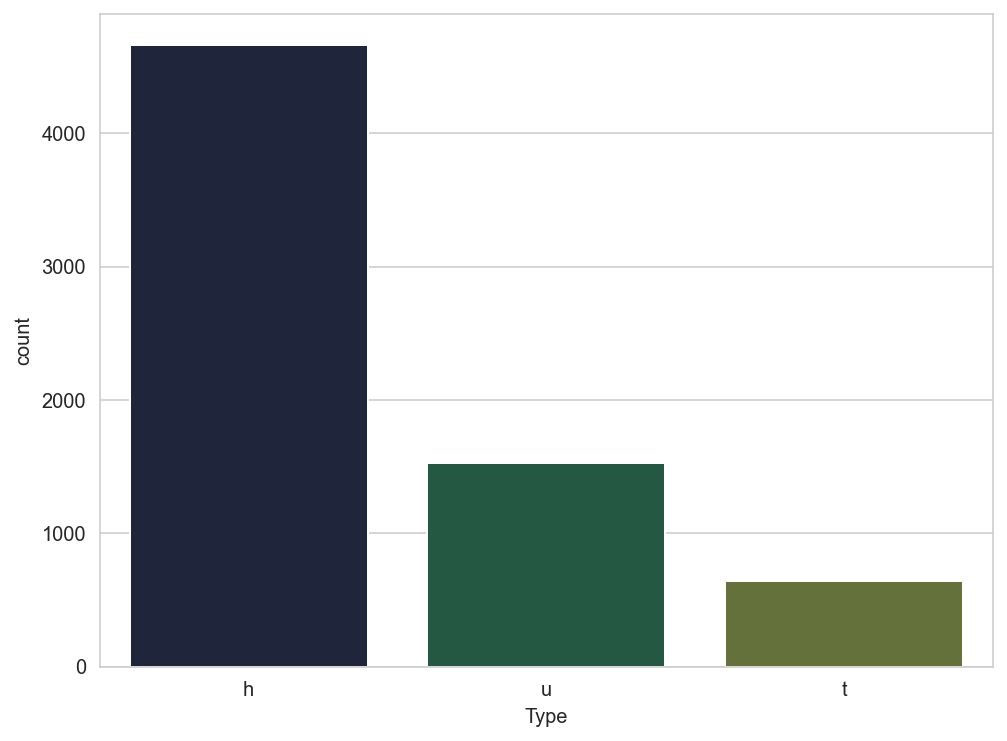

In [217]:
sns.countplot(x=df['Type']); # сколько объектов в каждой категории у Type

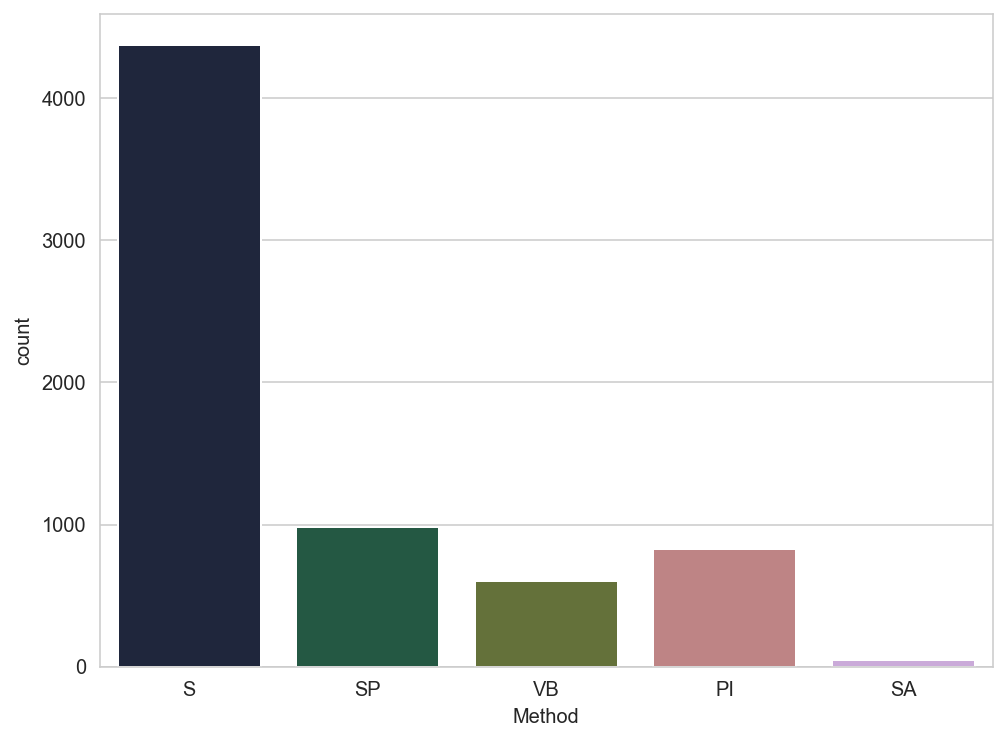

In [218]:
sns.countplot(x=df['Method']); # сколько объектов в каждой категории у Method

In [219]:
df = df[df['Method'] != 'SA'] # удаляем незначительную категорию SA
df.shape

(6786, 16)

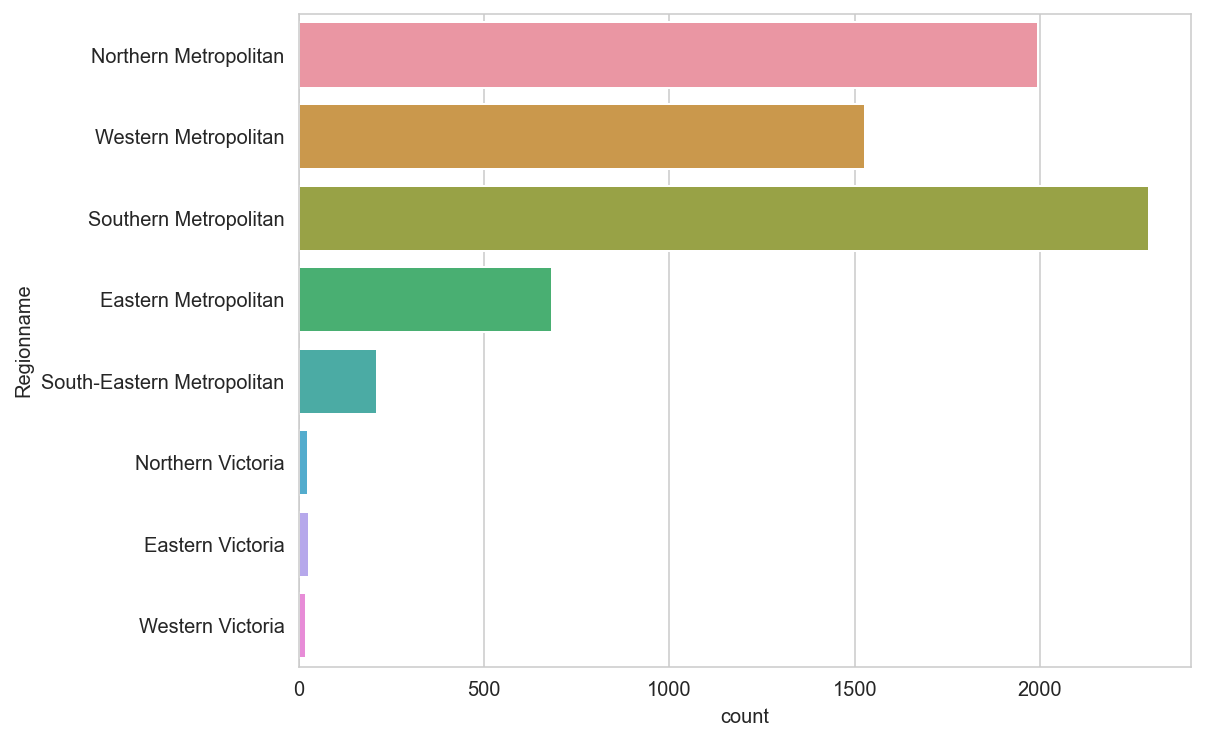

In [220]:
sns.countplot(y=df['Regionname']); # сколько объектов в каждой категории у Regionname

In [221]:
# удаляем незначительные категории Northern Victoria, Eastern Victoria, Western Victoria
df = df[(df['Regionname'] != 'Northern Victoria') &
        (df['Regionname'] != 'Eastern Victoria') &
        (df['Regionname'] != 'Western Victoria')]
df.shape # размерность данных после удаления категорий

(6714, 16)

## Изучение непрерывных переменных

Посмотрим на распределения данных и выловим выбросы с помощью гистограмм.

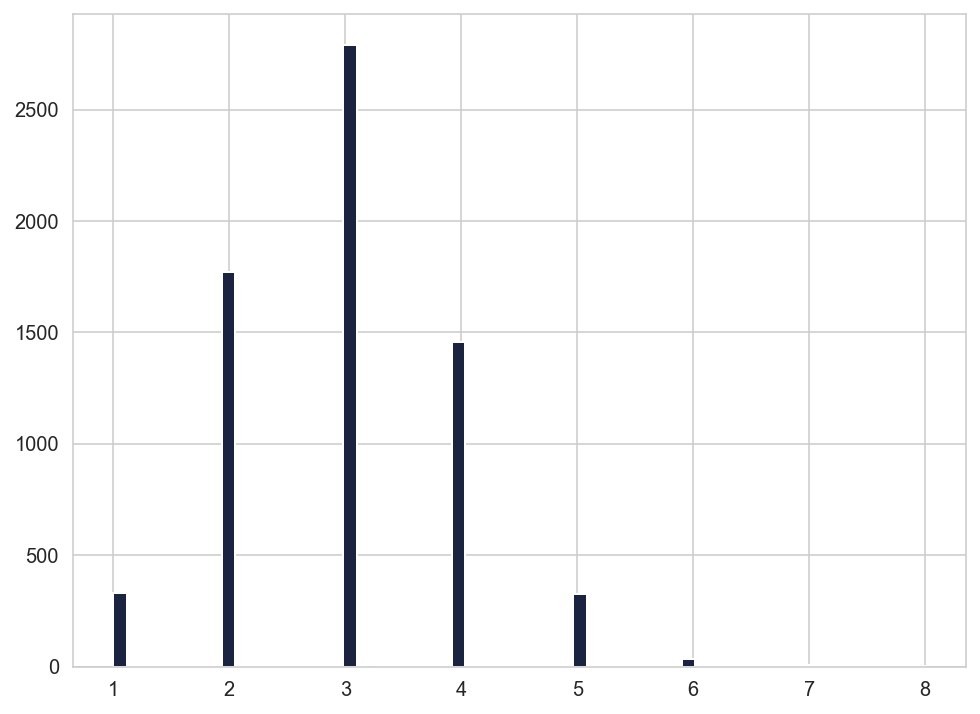

In [222]:
df['Rooms'].hist(bins=60); # количество комнат

In [223]:
len(df[df['Rooms'] > 6]) # мало наблюдений, больших 6

10

In [224]:
df = df[df['Rooms'] <= 6] # оставляем только те объекты, для которых значение Room <= 6

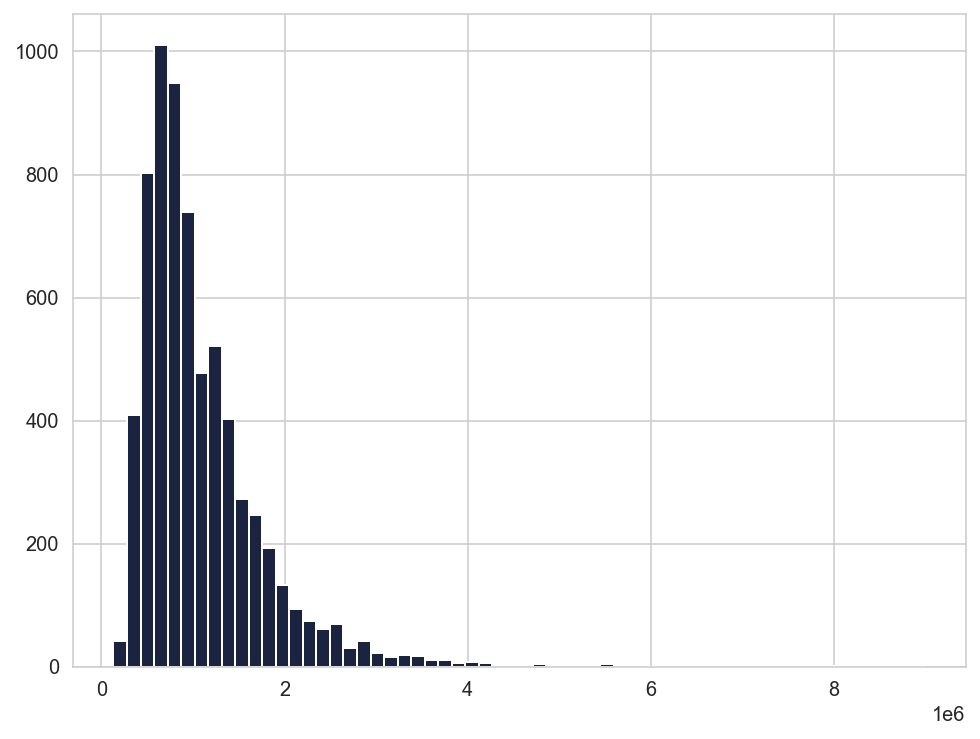

In [225]:
df['Price'].hist(bins=60); # цена

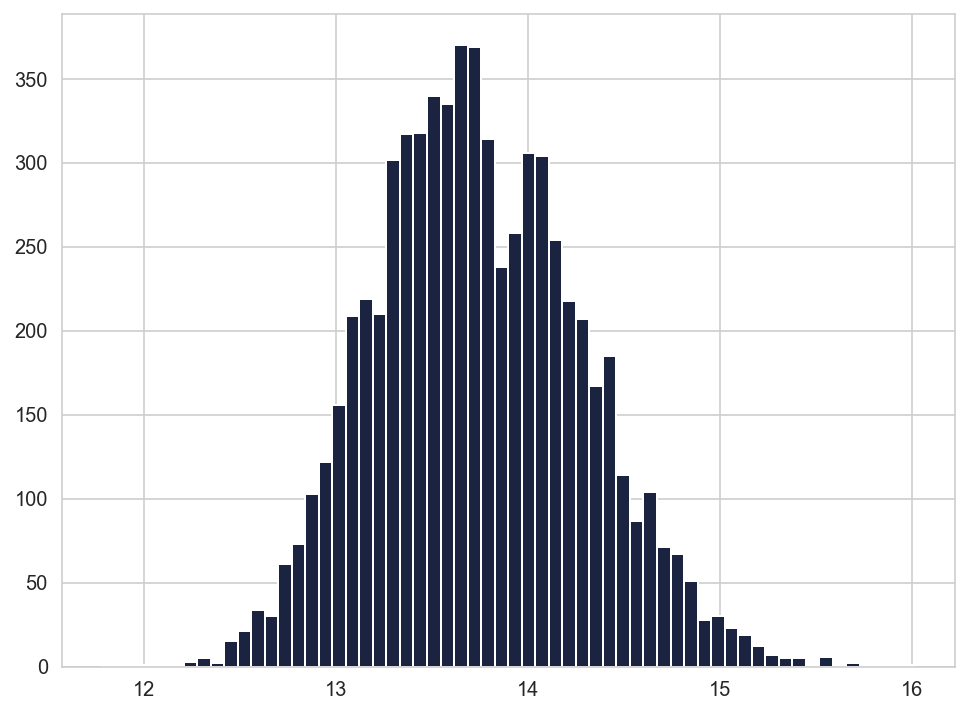

In [226]:
log_price = np.log1p(df['Price']) # логарифмируем, добавляя единичку, т.е. делаем ln(1 + X)
log_price.hist(bins=60); # логарифм цены

Распределение гораздо больше похоже на нормальное, поэтому цену заменим на логарифм цены.

In [227]:
df['Log_price'] = log_price # создаем колонку с новой переменной

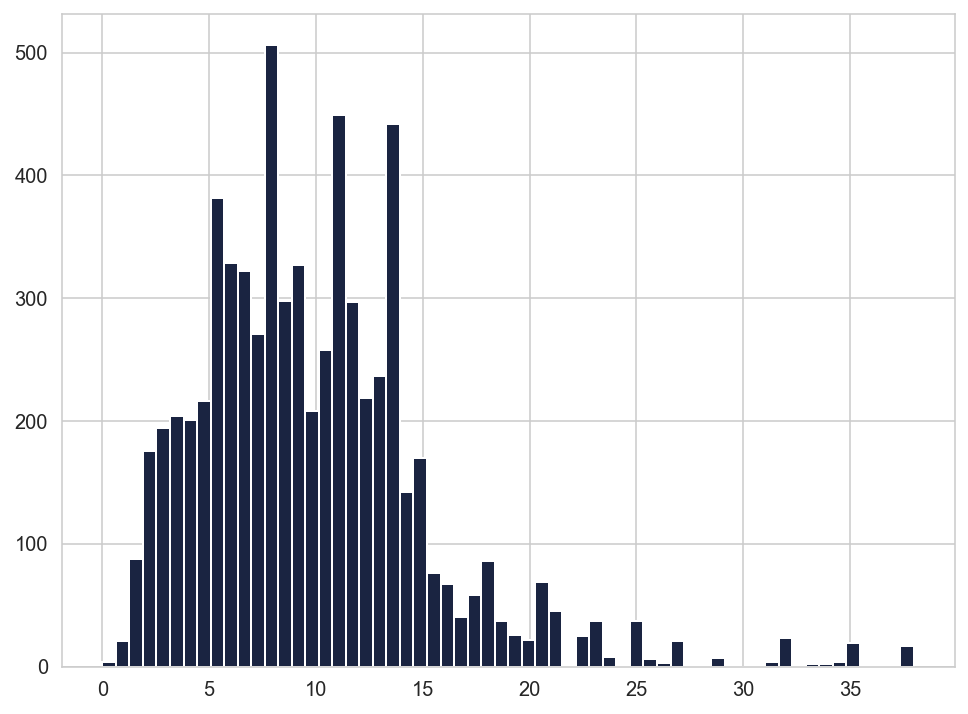

In [228]:
df['Distance'].hist(bins=60); # расстояние до центра города

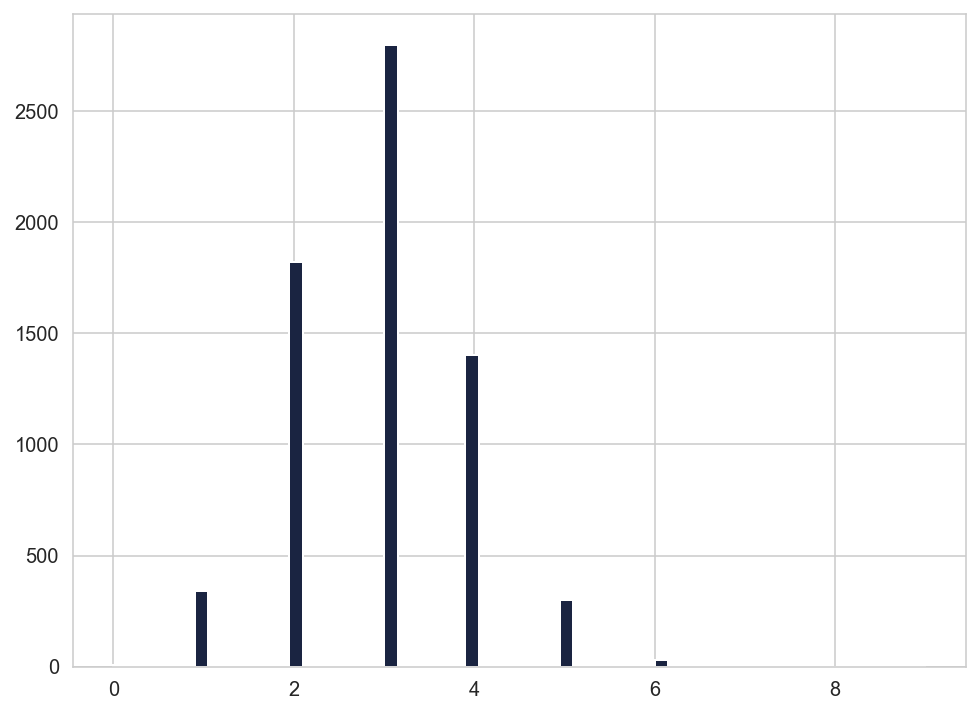

In [229]:
df['Bedroom2'].hist(bins=60); # количество спален

In [230]:
len(df[df['Bedroom2'] > 6]) # мало наблюдений, больших 6

2

In [231]:
df = df[df['Bedroom2'] <= 6] # оставляем только те объекты, для которых значение Bedroom2 <= 6

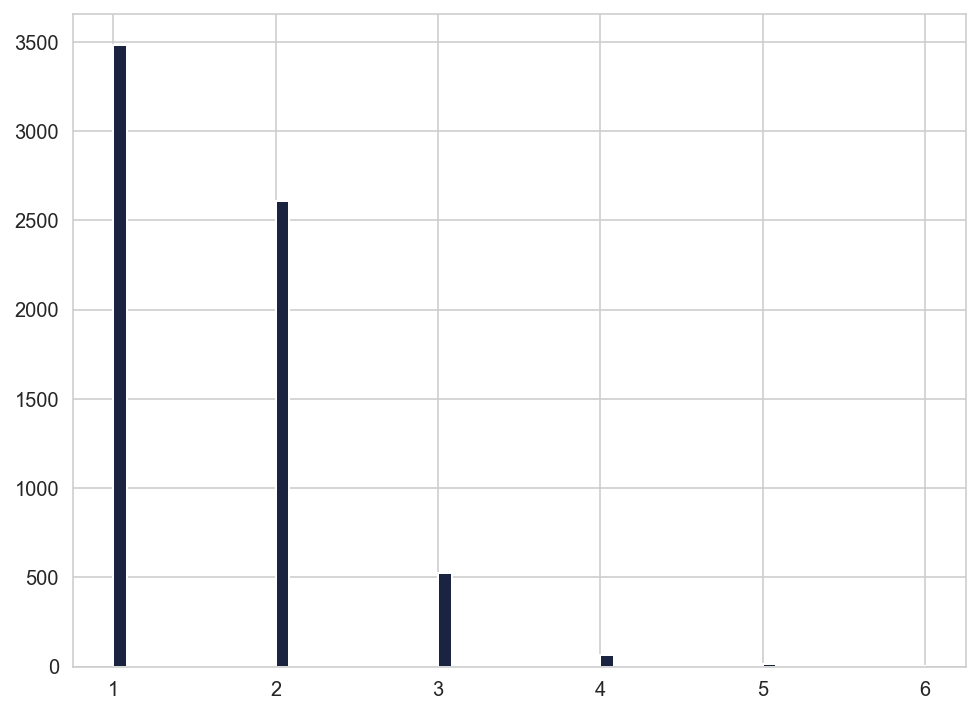

In [232]:
df['Bathroom'].hist(bins=60); # количество ванных

In [233]:
len(df[df['Bathroom'] > 4]) # мало наблюдений, больших 4

19

In [234]:
df = df[df['Bathroom'] <= 4] # оставляем только те объекты, для которых значение Bathroom <= 4

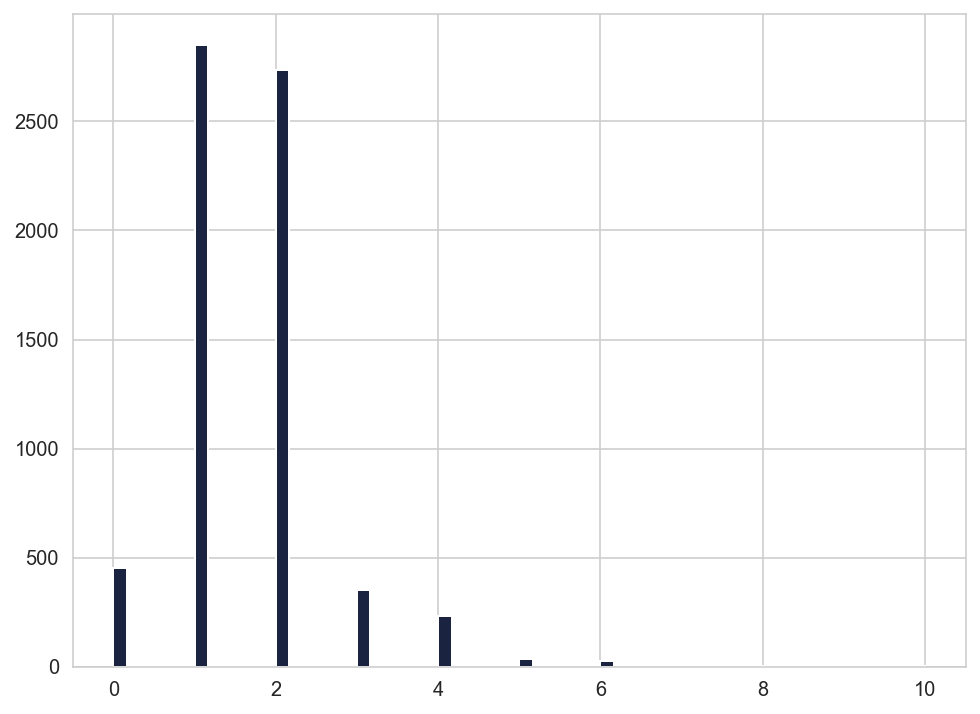

In [235]:
df['Car'].hist(bins=60); # количество парковочных мест

In [236]:
len(df[df['Car'] > 6]) # мало наблюдений, больших 6

9

In [237]:
df = df[df['Car'] <= 6] # оставляем только те объекты, для которых значение Car <= 6

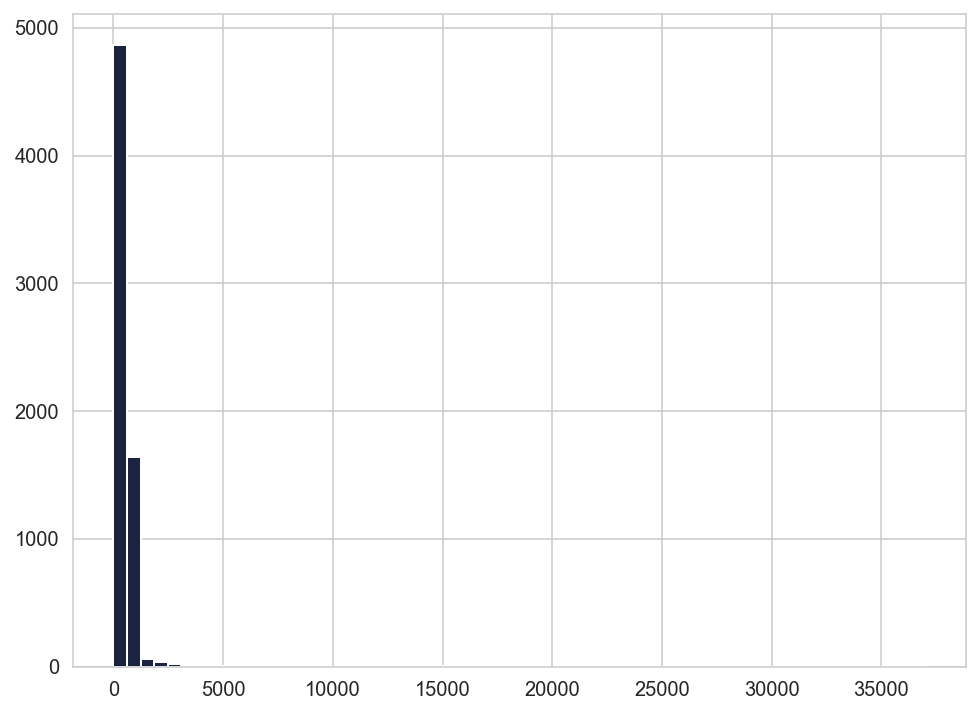

In [238]:
df['Landsize'].hist(bins=60); # площадь земли

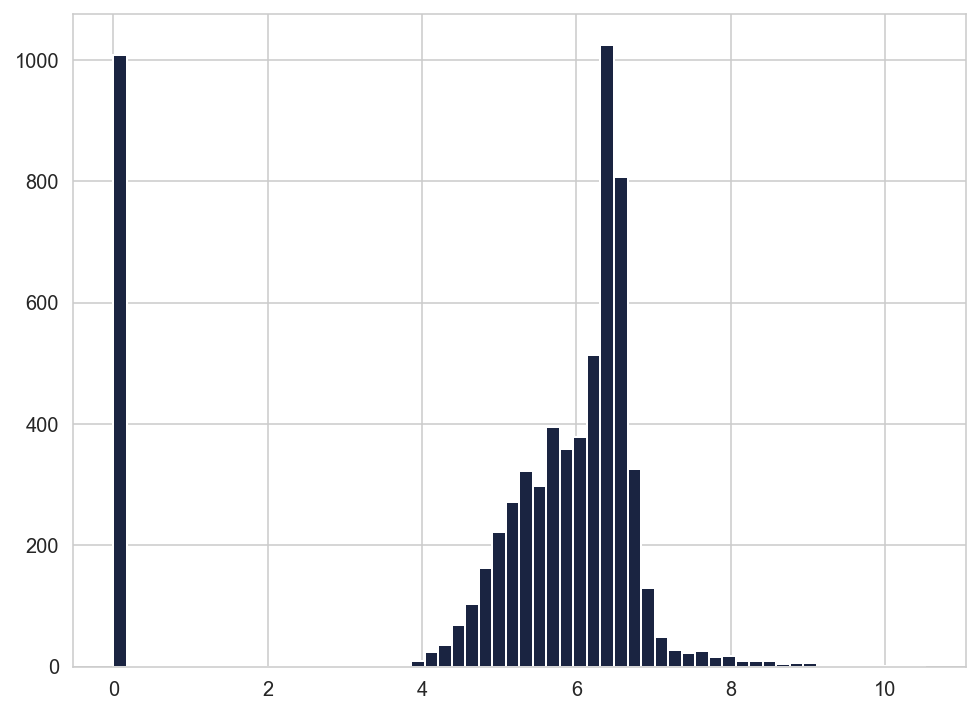

In [239]:
log_landsize = np.log1p(df['Landsize']) # логарифмируем, добавляя единичку, т.е. делаем ln(1 + X)
log_landsize.hist(bins=60); # логарифм площади земли

Есть объекты, для которых площадь земли равна нулю. Скорее всего, это многоквартирные дома, где человек покупает квартиру без земельного участка. Распределение ненулевых значений стало похожим на нормальное, стоит создать логарифм переменной.

In [240]:
df['Log_landsize'] = log_landsize # создаем колонку с новой переменной

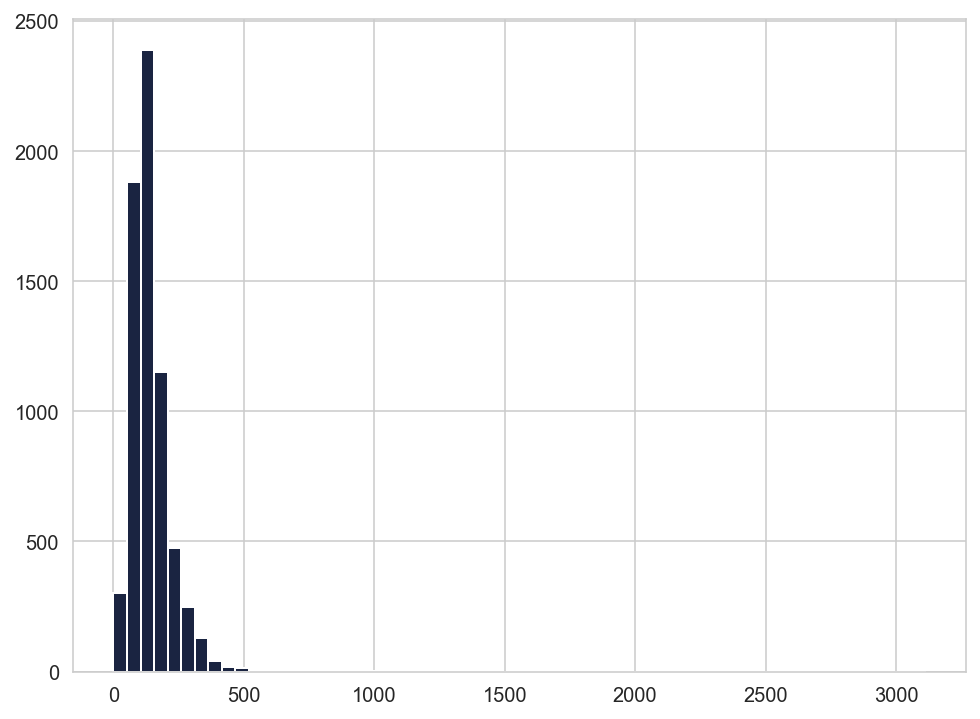

In [241]:
df['BuildingArea'].hist(bins=60); # площадь жилья

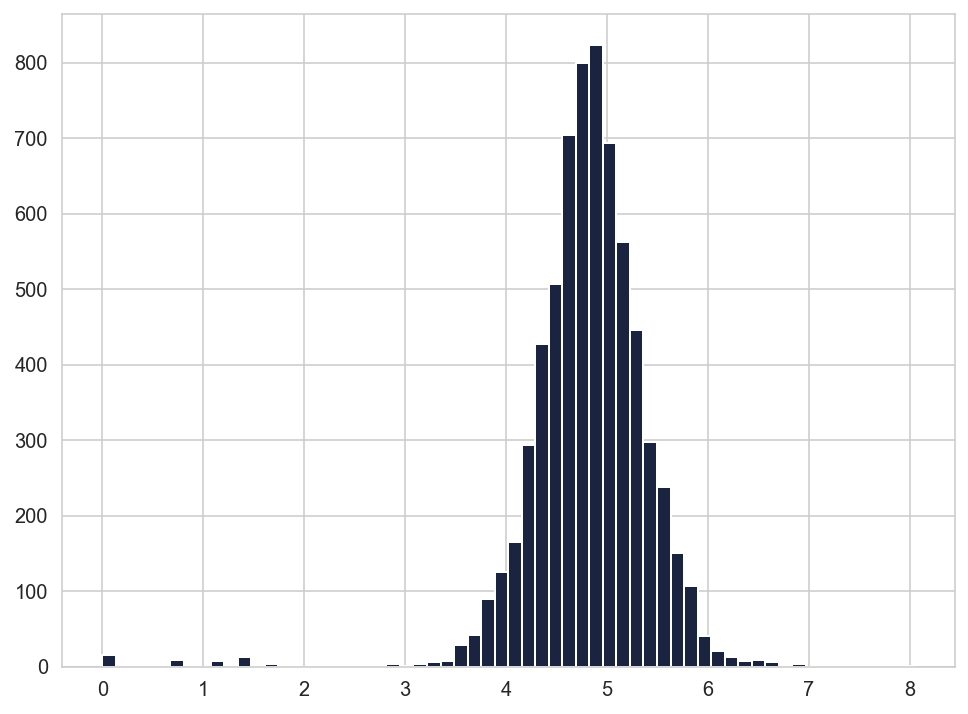

In [242]:
log_buildingarea = np.log1p(df['BuildingArea']) # логарифмируем, добавляя единичку, т.е. делаем ln(1 + X)
log_buildingarea.hist(bins=60); # логарифм площади жилья

Распределение стало похоже на нормальное, переменную лучше логарифмировать. Также удалим выбросы.

In [243]:
df['Log_buildingarea'] = log_buildingarea # создаем колонку с новой переменной
len(df[df['Log_buildingarea'] < 3]) # мало наблюдений, меньших 3

59

In [244]:
df = df[df['Log_buildingarea'] >= 3]
# оставляем только те объекты, для которых значение Log_buildingarea >= 3

In [245]:
len(df[df['Log_buildingarea'] >= 7]) # мало наблюдений, больших или равных 7

2

In [246]:
df = df[df['Log_buildingarea'] < 7] 
# оставляем только те объекты, для которых значение Log_buildingarea < 7

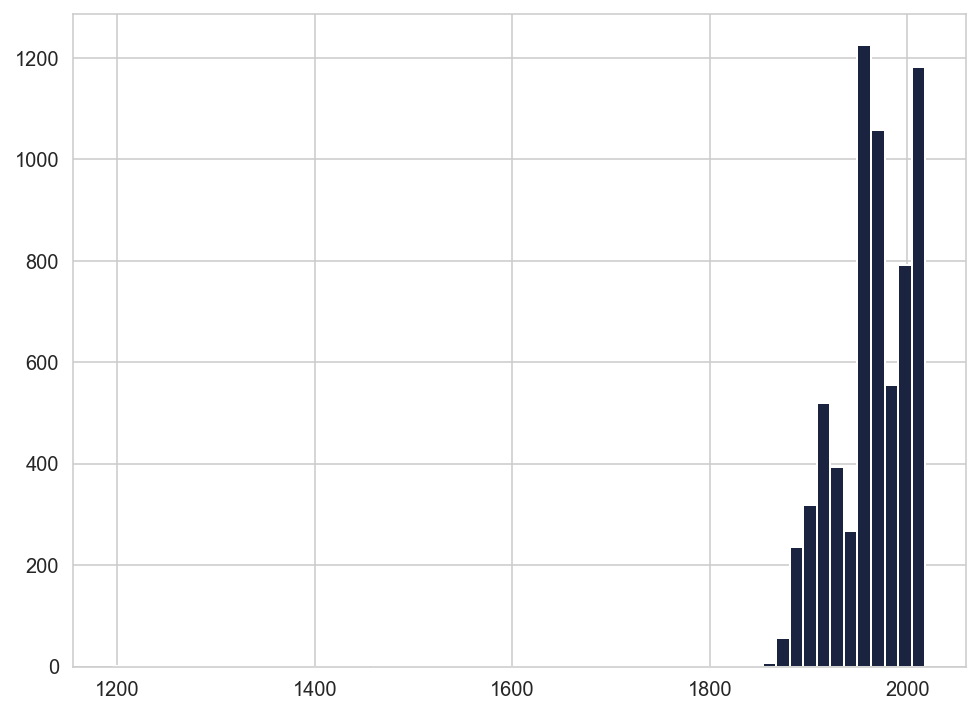

In [247]:
df['YearBuilt'].hist(bins=60); # год постройки

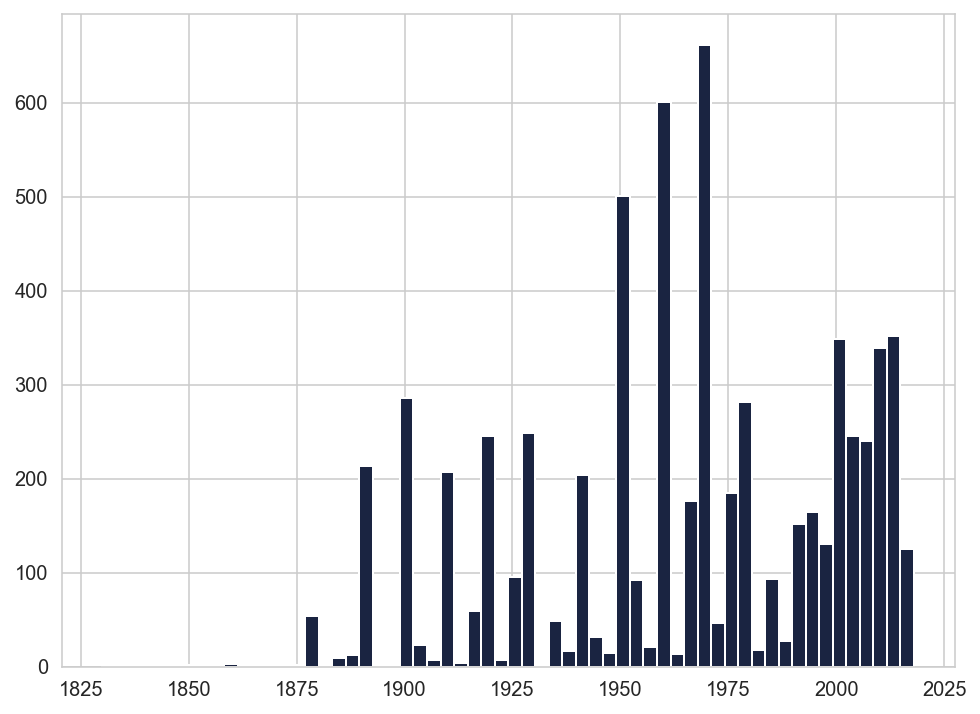

In [248]:
df = df[df['YearBuilt'] > 1800] # оставляем только те объекты, для которых значение YearBuilt > 1800
df['YearBuilt'].hist(bins=60); # год постройки после удаления части значений

In [249]:
df = df[df['YearBuilt'] > 1875] # оставляем только те объекты, для которых значение YearBuilt > 1875

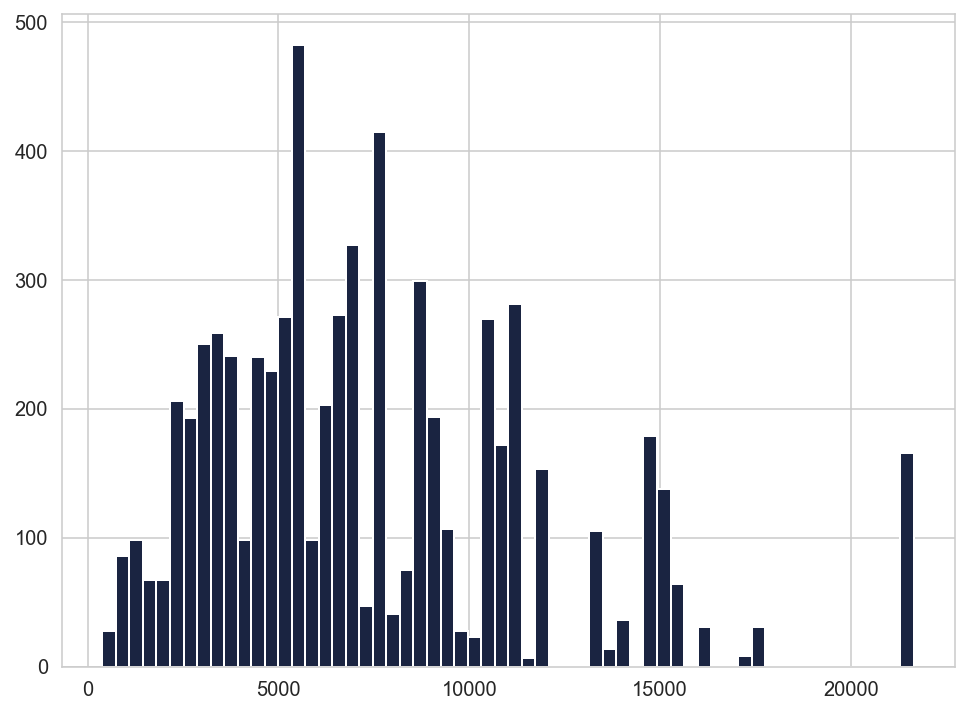

In [250]:
df['Propertycount'].hist(bins=60); # количество объектов собственности в округе

In [251]:
df.shape # размерность данных после удаления выбросов

(6600, 19)

In [252]:
num = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt',
       'Propertycount', 'Log_landsize', 'Log_buildingarea', 'Log_price']
# заменяем некоторые переменные на их логарифмы в списке числовых признаков

In [253]:
df = df[cat + num + fictive] # вносим эти изменения в датасет

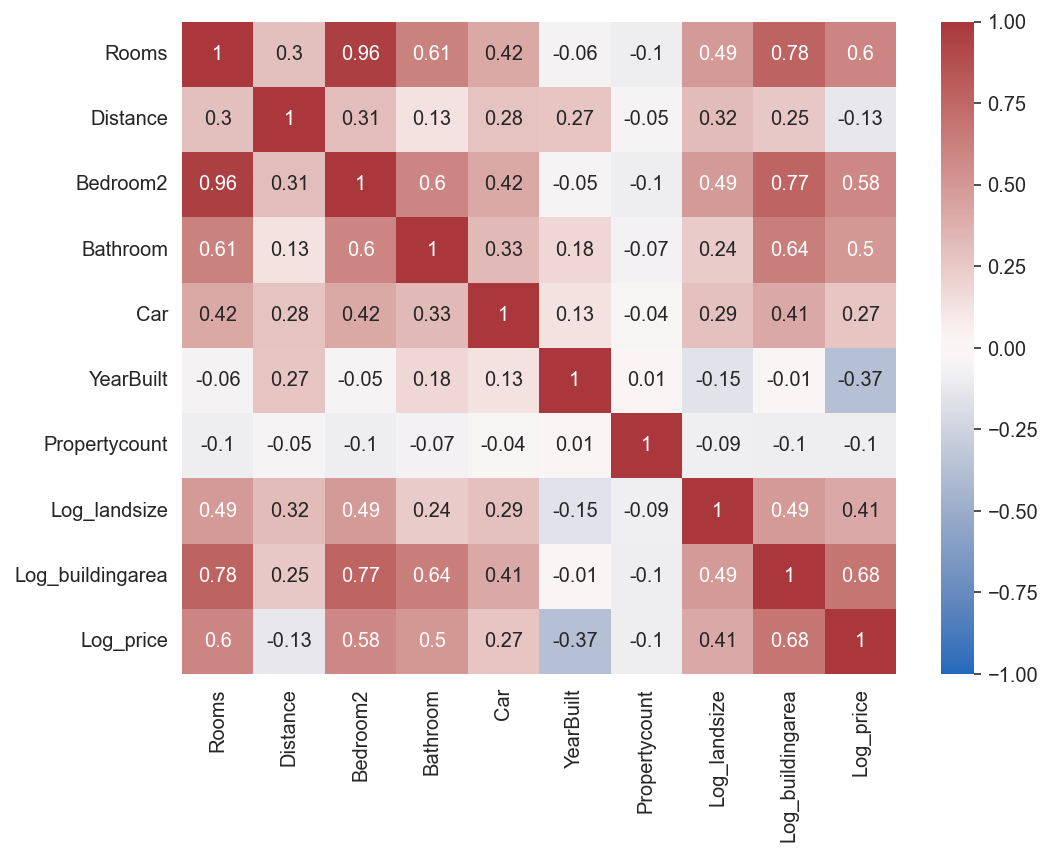

In [254]:
# корреляционная матрица
sns.heatmap(df[cat + num].corr().round(2), # матрица корреляций, значения округлили до двух знаков после запятой
            vmin=-1, # нижнее значение цветовой полосы справа (-1)
            vmax=1, # верхнее значение цветовой полосы справа (-1)
            annot=True, # подписывать значения корреляций в ячейках
            cmap='vlag'); # цветовая палитра

Переменные, которые характеризуют число комнат (всех и конкретных) сильно коррелируют друг с другом и с площадью жилья. Удалим их, чтобы переменные в модели были независимыми.

In [255]:
df.drop(columns=['Rooms', 'Bedroom2', 'Bathroom'], inplace=True) # удаляем переменные из данных
num = ['Distance', 'Car', 'YearBuilt', 'Propertycount',
       'Log_landsize', 'Log_buildingarea', 'Log_price'] # удаляем переменные из списка 

In [256]:
to_int = ['Car', 'YearBuilt', 'Propertycount'] # переменные, которые должны быть int, а не float
df[to_int] = df[to_int].astype(int) # переводим их из вещественных в целочисленные

In [257]:
df.head() # очищенные данные, которые мы будем исследовать

,Type,Method,Regionname,Distance,Car,YearBuilt,Propertycount,Log_landsize,Log_buildingarea,Log_price,Date,Lattitude,Longtitude
1,h,S,Northern Metropolitan,2.5,0,1900,4019,5.056246,4.382027,13.849913,4/02/2016,-37.8079,144.9934
2,h,SP,Northern Metropolitan,2.5,0,1900,4019,4.905275,5.017280,14.197366,4/03/2017,-37.8093,144.9944
4,h,VB,Northern Metropolitan,2.5,2,2014,4019,4.795791,4.962845,14.285515,4/06/2016,-37.8072,144.9941
6,h,S,Northern Metropolitan,2.5,0,1910,4019,5.505332,5.351858,14.444653,7/05/2016,-37.8024,144.9993
7,h,S,Northern Metropolitan,2.5,2,1890,4019,5.549076,4.682131,14.307765,8/10/2016,-37.8060,144.9954


In [258]:
df.shape # итоговая размерность данных 

(6600, 13)

In [259]:
df[num].describe().round(2) # описательные статистики
# все значения округляем до 2 знаков после запятой

,Distance,Car,YearBuilt,Propertycount,Log_landsize,Log_buildingarea,Log_price
count,6600.00,6600.00,6600.00,6600.00,6600.00,6600.00,6600.00
mean,9.90,1.59,1964.28,7454.84,5.12,4.85,13.74
std,5.47,0.91,36.38,4348.19,2.26,0.48,0.54
min,0.00,0.00,1877.00,389.00,0.00,3.09,11.78
25%,6.10,1.00,1940.00,4407.00,5.11,4.55,13.36
50%,9.20,2.00,1970.00,6567.00,5.99,4.84,13.70
75%,12.90,2.00,1999.25,10331.00,6.45,5.15,14.10
max,38.00,6.00,2018.00,21650.00,10.52,6.95,16.01


# Визуализация данных (часть 1)

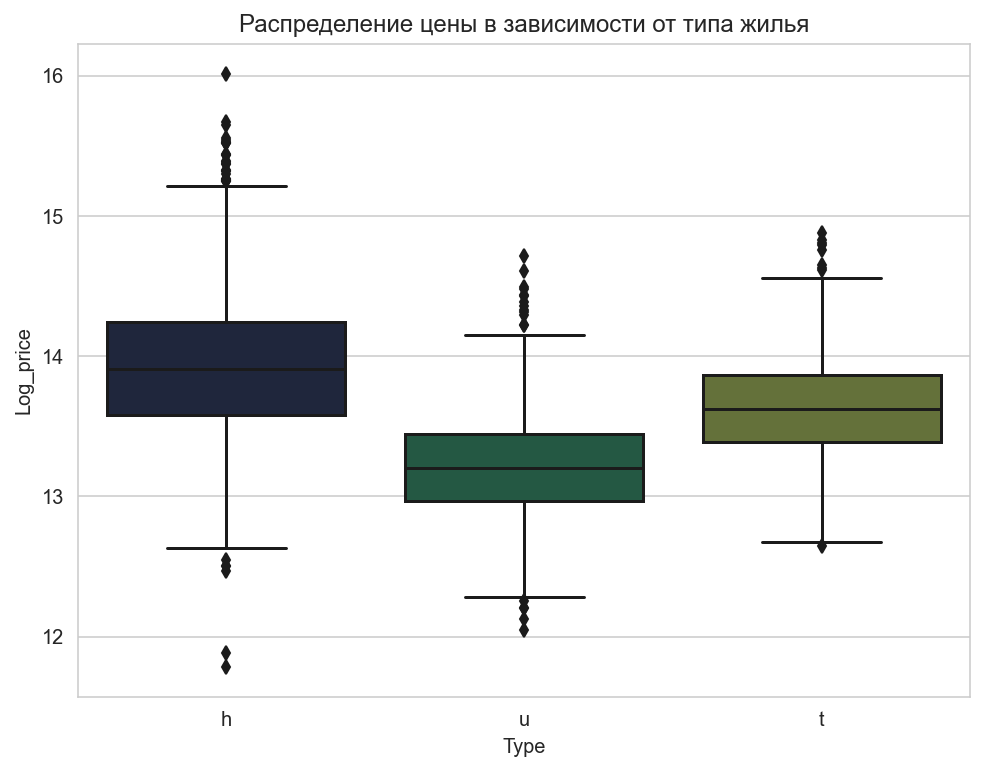

In [267]:
sns.boxplot(data=df, x='Type', y='Log_price')
plt.title('Распределение цены в зависимости от типа жилья');

__Гипотеза 1:__ для категорий переменной Type попарно наблюдается разница в средних (ttest)

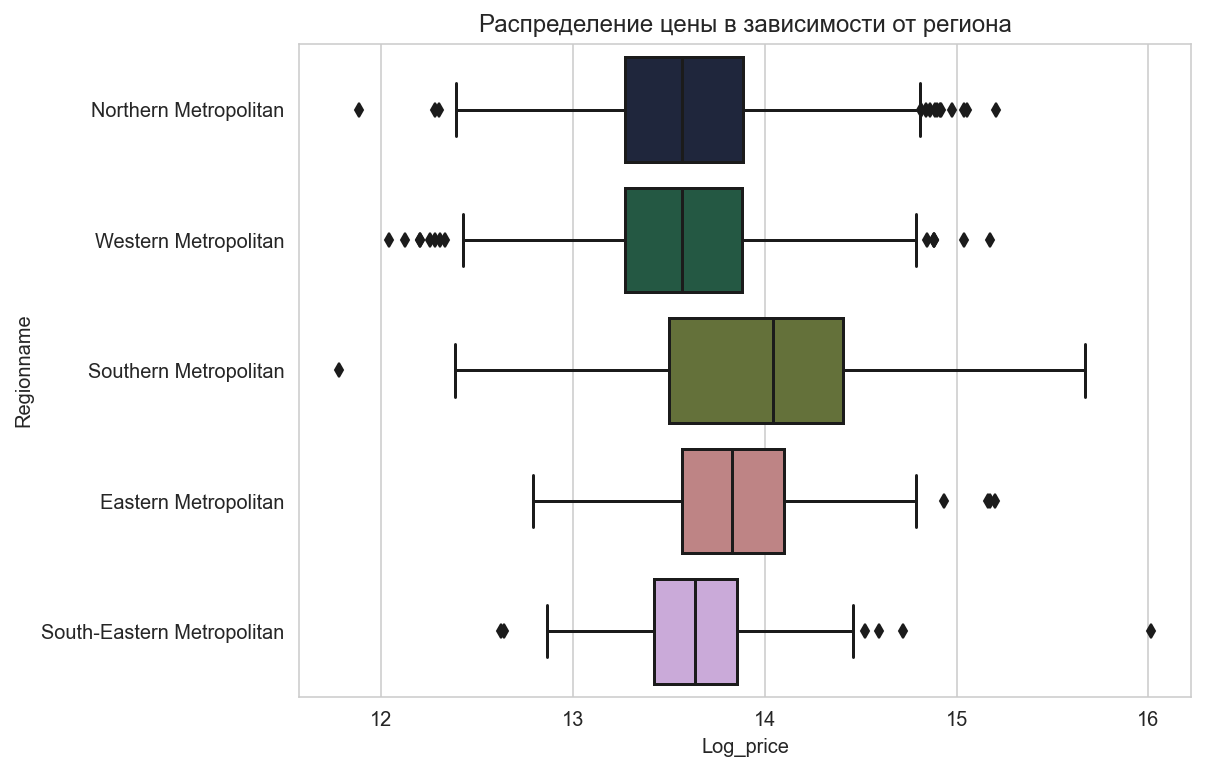

In [269]:
sns.boxplot(data=df, x='Log_price', y='Regionname')
plt.title('Распределение цены в зависимости от региона');

__Гипотеза 2:__ среднее по Southern Metropolitan больше среднего по Western Metropolitan (ttest)

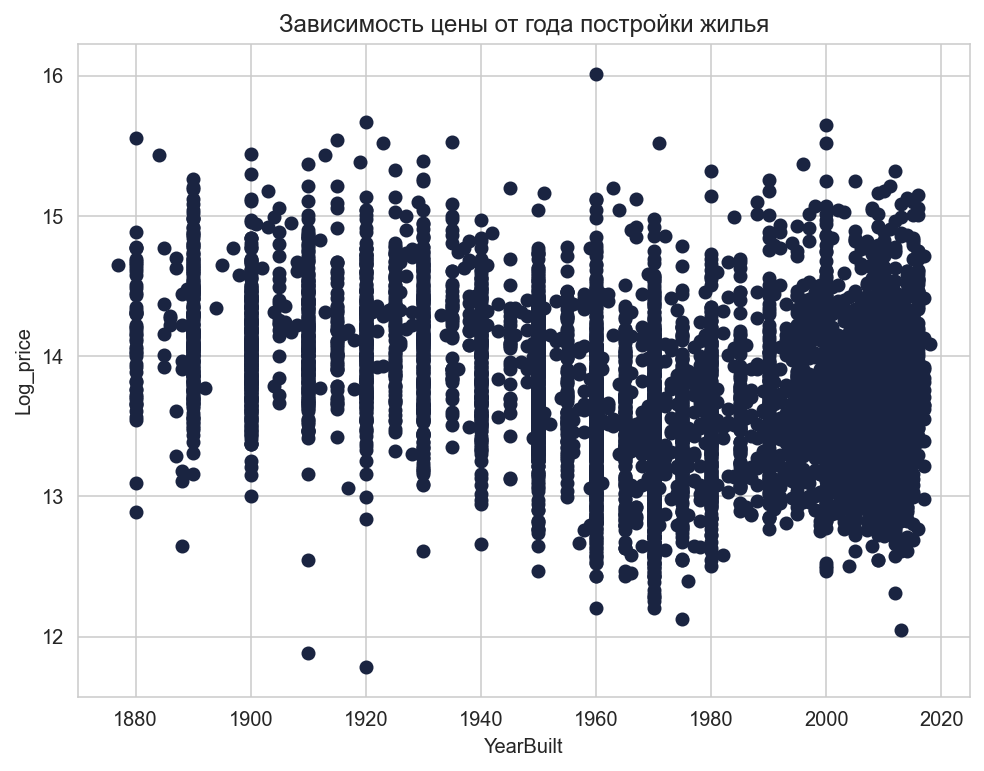

In [271]:
plt.scatter(data=df, x='YearBuilt', y='Log_price');
plt.xlabel('YearBuilt')
plt.ylabel('Log_price')
plt.title('Зависимость цены от года постройки жилья');

__Гипотеза 3:__ цена зависит от года постройки полиномиально; следует включить квадрат переменной YearBuilt и, возможно, куб

# План дальнейшего анализа

__Создание новых переменных:__
- уровень инфляции на момент Date (минимальная дата за базовую)
- месяц продажи
- расстояние до других значимых точек (например, аэропорт Мельбурна)
- возможно, другие переменные

__Проверка гипотез:__
- гипотезы 1-3
- новые гипотезы со старыми и новыми переменными

__Машинное обучение:__
- удаление вспомогательных признаков
- дамми-переменные
- масштабирование
- линейная регрессия с зависимой переменной Log_price